In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Workspace/MF_Model/Modules')

import mf_models as mf
import model_type as mt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [2]:
vec_tauE = np.linspace(0, 100, 100)

df_muE_iRate = pd.DataFrame({})
df_varE_iRate = pd.DataFrame({})
EL = -60
EE = 0
EI = -80
vec_nuE = [0.005, 0.01, 0.02]
wE = 0.1
wI = 0.4
tauI = 10
KE = 400
KI = 100
Vth= -50
Vr = -60
tauL = 20
tauR = 2
for nuE in vec_nuE:
	df_muE_iRate[nuE] = vec_tauE*nuE*wE*KE
	df_varE_iRate[nuE] = wE*np.sqrt(vec_tauE*nuE*KE/2)

In [3]:
vec_tauE = np.linspace(0, 100, 100)

df_muE_wE = pd.DataFrame({})
df_varE_wE = pd.DataFrame({})
EL = -60
EE = 0
EI = -80
nuE = 0.005
vec_wE = [0.1, 1, 10]
wI = 0.8
tauI = 10
KE = 400
KI = 100
Vth= -50
Vr = -60
tauL = 20
tauR = 2
for wE in vec_wE:
	df_muE_wE[wE] = vec_tauE*nuE*wE*KE
	df_varE_wE[wE] = wE*np.sqrt(vec_tauE*nuE*KE/2)

In [4]:
data_directory_path = "../../Data/V_data/"

df_mean_gA_iRate = pd.read_csv(f"{data_directory_path}mean_gA_iRate.dat")
df_var_gA_iRate = pd.read_csv(f"{data_directory_path}var_gA_iRate.dat")
df_skew_gA_iRate = pd.read_csv(f"{data_directory_path}skew_gA_iRate.dat")
df_mean_gA_wE = pd.read_csv(f"{data_directory_path}mean_gA_wE.dat")
df_var_gA_wE = pd.read_csv(f"{data_directory_path}var_gA_wE.dat")
df_skew_gA_wE = pd.read_csv(f"{data_directory_path}skew_gA_wE.dat")

In [5]:
df_varE_wE

,0.1,1.0,10.0
0,0.000000,0.000000,0.000000
1,0.100504,1.005038,10.050378
2,0.142134,1.421338,14.213381
3,0.174078,1.740777,17.407766
4,0.201008,2.010076,20.100756
...,...,...,...
95,0.979590,9.795897,97.958969
96,0.984732,9.847319,98.473193
97,0.989847,9.898475,98.984745
98,0.994937,9.949367,99.493668


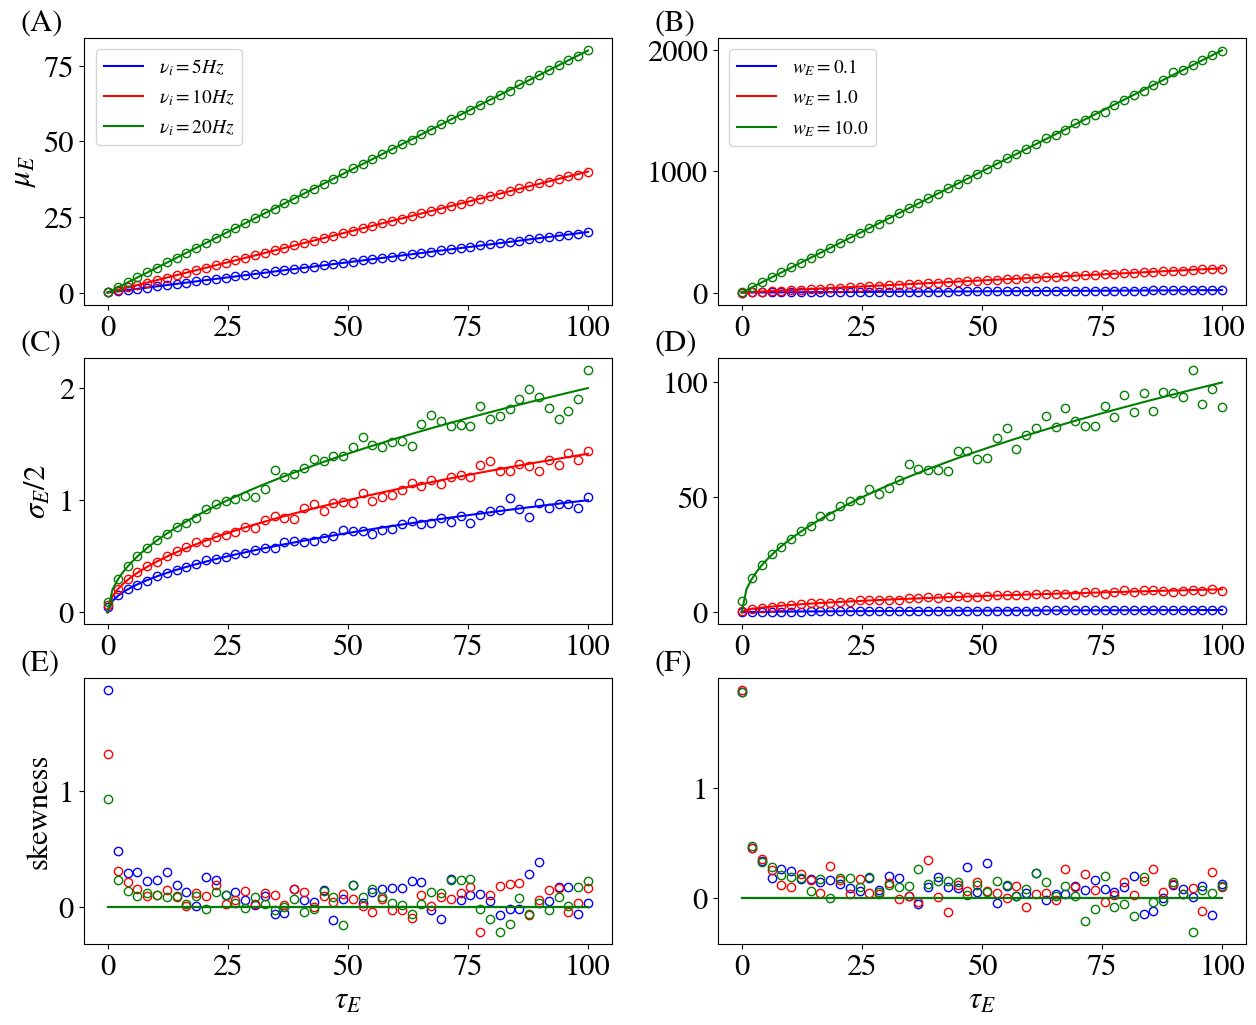

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(15,12), dpi=100, squeeze=False)

axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][0].annotate("(C)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][1].annotate("(D)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[2][0].annotate("(E)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[2][1].annotate("(F)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[2][0].set_xlabel(r'$\tau_E$')
axs[2][1].set_xlabel(r'$\tau_E$')
axs[1][0].set_ylabel(r'$\sigma_E/2$')
axs[0][0].set_ylabel(r'$\mu_E$')
axs[2][0].set_ylabel('skewness')

axs[0][0].plot(vec_tauE, df_muE_iRate[0.005], 'b-', label=r'$\nu_i=5Hz$')
axs[0][0].plot(np.linspace(0.1,100,50), df_mean_gA_iRate['5']/1000, 'bo', markerfacecolor='none')
axs[0][0].plot(vec_tauE, df_muE_iRate[0.01], 'r-', label=r'$\nu_i=10Hz$')
axs[0][0].plot(np.linspace(0.1,100,50), df_mean_gA_iRate['10']/1000, 'ro', markerfacecolor='none')
axs[0][0].plot(vec_tauE, df_muE_iRate[0.02], 'g-', label=r'$\nu_i=20Hz$')
axs[0][0].plot(np.linspace(0.1,100,50), df_mean_gA_iRate['20']/1000, 'go', markerfacecolor='none')

axs[1][0].plot(vec_tauE, df_varE_iRate[0.005], 'b-')
axs[1][0].plot(np.linspace(0.1,100,50), np.sqrt(df_var_gA_iRate['5'])/1000, 'bo', markerfacecolor='none')
axs[1][0].plot(vec_tauE, df_varE_iRate[0.01], 'r-')
axs[1][0].plot(np.linspace(0.1,100,50), np.sqrt(df_var_gA_iRate['10'])/1000, 'ro', markerfacecolor='none')
axs[1][0].plot(vec_tauE, df_varE_iRate[0.02], 'g-')
axs[1][0].plot(np.linspace(0.1,100,50), np.sqrt(df_var_gA_iRate['20'])/1000, 'go', markerfacecolor='none')

axs[2][0].plot(vec_tauE, np.zeros_like(vec_tauE), 'b-')
axs[2][0].plot(np.linspace(0.1,100,50), df_skew_gA_iRate['5'], 'bo', markerfacecolor='none')
axs[2][0].plot(vec_tauE, np.zeros_like(vec_tauE), 'r-')
axs[2][0].plot(np.linspace(0.1,100,50), df_skew_gA_iRate['10'], 'ro', markerfacecolor='none')
axs[2][0].plot(vec_tauE, np.zeros_like(vec_tauE), 'g-')
axs[2][0].plot(np.linspace(0.1,100,50), df_skew_gA_iRate['20'], 'go', markerfacecolor='none')

axs[0][1].plot(vec_tauE, df_muE_wE[0.1], 'b-', label=r'$w_E=0.1$')
axs[0][1].plot(np.linspace(0.1,100,50), df_mean_gA_wE['0.1']/1000, 'bo', markerfacecolor='none')
axs[0][1].plot(vec_tauE, df_muE_wE[1], 'r-', label=r'$w_E=1.0$')
axs[0][1].plot(np.linspace(0.1,100,50), df_mean_gA_wE['1']/1000, 'ro', markerfacecolor='none')
axs[0][1].plot(vec_tauE, df_muE_wE[10], 'g-', label=r'$w_E=10.0$')
axs[0][1].plot(np.linspace(0.1,100,50), df_mean_gA_wE['10']/1000, 'go', markerfacecolor='none')

axs[1][1].plot(vec_tauE, df_varE_wE[0.1], 'b-')
axs[1][1].plot(np.linspace(0.1,100,50), np.sqrt(df_var_gA_wE['0.1'])/1000, 'bo', markerfacecolor='none')
axs[1][1].plot(vec_tauE, df_varE_wE[1], 'r-')
axs[1][1].plot(np.linspace(0.1,100,50), np.sqrt(df_var_gA_wE['1'])/1000, 'ro', markerfacecolor='none')
axs[1][1].plot(vec_tauE, df_varE_wE[10], 'g-')
axs[1][1].plot(np.linspace(0.1,100,50), np.sqrt(df_var_gA_wE['10'])/1000, 'go', markerfacecolor='none')

axs[2][1].plot(vec_tauE, np.zeros_like(vec_tauE), 'b-')
axs[2][1].plot(np.linspace(0.1,100,50), df_skew_gA_wE['0.1'], 'bo', markerfacecolor='none')
axs[2][1].plot(vec_tauE, np.zeros_like(vec_tauE), 'r-')
axs[2][1].plot(np.linspace(0.1,100,50), df_skew_gA_wE['1'], 'ro', markerfacecolor='none')
axs[2][1].plot(vec_tauE, np.zeros_like(vec_tauE), 'g-')
axs[2][1].plot(np.linspace(0.1,100,50), df_skew_gA_wE['10'], 'go', markerfacecolor='none')
axs[0][0].legend(bbox_to_anchor=(0.3, 0.96), loc=1, borderaxespad=0., prop={'size': 14})
axs[0][1].legend(bbox_to_anchor=(0.3, 0.96), loc=1, borderaxespad=0., prop={'size': 14})